In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv('data/full_medal_data.csv')
df = df.sort_values(by=['Country Code', 'Year']).reset_index(drop=True)
df

,Rank,NOC,Gold,Silver,Bronze,Total,Year,Country Code,Is_Host,Ex-Host,Host Continent,Team Size,Participated Events,Total Events
0,0,Afghanistan,0,0,0,0,1936,AFG,0,0,0,16.0,4,129.0
1,0,Afghanistan,0,0,0,0,1948,AFG,0,0,0,25.0,2,136.0
2,0,Afghanistan,0,0,0,0,1956,AFG,0,0,0,12.0,1,151.0
3,0,Afghanistan,0,0,0,0,1960,AFG,0,0,0,16.0,13,150.0
4,0,Afghanistan,0,0,0,0,1964,AFG,0,0,1,8.0,8,163.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3197,38,Zimbabwe,1,3,0,4,2008,ZIM,0,0,0,16.0,15,302.0
3198,0,Zimbabwe,0,0,0,0,2012,ZIM,0,0,0,9.0,8,302.0
3199,0,Zimbabwe,0,0,0,0,2016,ZIM,0,0,0,31.0,13,306.0
3200,0,Zimbabwe,0,0,0,0,2020,ZIM,0,0,0,5.0,5,339.0


In [161]:
countries = df['Country Code'].unique()

rows = []
for country_name in countries:
    country = df[df['Country Code'] == country_name][['Country Code', 'Year', 'Total', 'Team Size', 'Participated Events']]
    
    first_medal_yr = country[country['Total'] > 0]
    if len(first_medal_yr) == 0:
        continue
    first_medal_yr = first_medal_yr.iloc[0,1]

    first_medal = df[(df['Year'] == first_medal_yr) & (df['Country Code'] == country_name)]
    no_medals = df[(df['Year'] < first_medal_yr) & (df['Country Code'] == country_name)]

    rows.append([*first_medal.iloc[0].loc[['Team Size', 'Participated Events']], 1])
    for i in range(len(no_medals)):
        rows.append([*no_medals.iloc[i].loc[['Team Size', 'Participated Events']], 0])

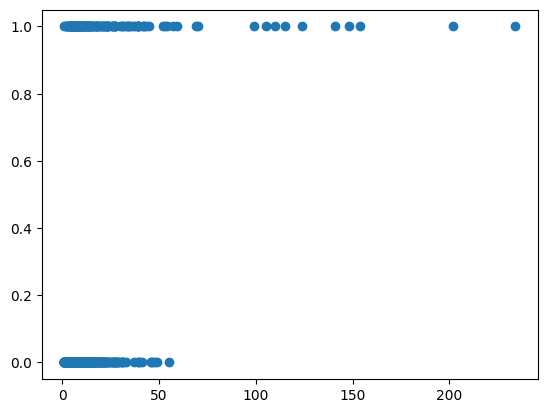

In [173]:
first_medals = pd.DataFrame(rows, columns=['Team Size', 'Participated Events', 'First Medal'])
plt.scatter(first_medals['Participated Events'], first_medals['First Medal'])

In [174]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [195]:
X = first_medals[['Team Size', 'Participated Events']].to_numpy()
y = first_medals[['First Medal']].to_numpy().flatten()

In [199]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
reg = LogisticRegression().fit(X_train, y_train)

score = reg.score(X_test, y_test)
print(score)

0.7432432432432432
